In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
! pip3 install wordcloud
! pip3 install nltk




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 185.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.8/284.8 kB 5.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


<div style="background-color: #013a63; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    BBC News Classification Kaggle Mini-Project
</div>

<div style="background-color: #013a63; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Instructions
</div>

1. Extracting word features and show Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)


2. Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis? 


3. Please feel free to look at online resources on processing raw texts to feature vectors. Many methods process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a method and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words. Also, do exploratory data analysis such as word statistics and/or visualization.


4. As we did not learn natural language processing (NLP) specific techniques such as word embeddings in the lectures, we recommend reading discussions and example codes from others in the Kaggle and/or doing some research online to make sure you understand. You can refer to any resource as needed, but make sure you “demonstrate” your understanding- please include explaining in your own words, discussions, and your interpretation. Also importantly, please have a reference list at the end of the report. 


5. There are a lot of sources that generate a huge amount of information everyday. Automated news classification plays a critical role in digital area and allows users to access articles quickly and efficiently.

<div style="background-color: #013a63; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Introduction
</div>

### Problem Statement

Classifying news articles into predefined categories (e.g., tech, politics, business, entertainment, and sport) is a critical task in Natural Language Processing (NLP). This project aims to explore and evaluate various techniques, including matrix factorization and suppervised learning approaches, to achieve accurate news categorization.

#### Data

We’ll use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech.

The dataset is broken into 1490 records for training and 735 for testing. 

#### Goal
The goal will be to build a system that can accurately classify previously unseen news articles into the right category.

#### Approach
1. Extracting word features and show Exploratory Data Analysis
2. Building and training models
3. Compare with supervised learning

#### Evaluation
Evaluation using Accuracy as a metric.

<div style="background-color: purple; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Loading Libraries
</div>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
from wordcloud import WordCloud

from string import punctuation
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

<div style="background-color: green; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    EDA and Data Preprocessing
</div>

<div style="background-color: #005f99; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Data Overview
</div>

In [2]:
# Data files

train_file = "./data/BBC News Train.csv"
test_file = "./data/BBC News Test.csv"

In [5]:
# Load the datasets

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

In [6]:
# Display Train and Test datasets information

print('Train dataset shape:', train_df.shape)
print('Test dataset shape:', test_df.shape)
print('Train dataset columns:', train_df.columns.tolist())
print('Test dataset columns:', test_df.columns.tolist())

Train dataset shape: (1490, 3)
Test dataset shape: (735, 2)
Train dataset columns: ['ArticleId', 'Text', 'Category']
Test dataset columns: ['ArticleId', 'Text']


In [7]:
# Display the first few rows of the train dataset

print('Train dataset head: \n')
train_df.head()

Train dataset head: 



,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [8]:
# Display the first few rows of the test dataset

print('Test dataset head: \n')
test_df.head()

Test dataset head: 



,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [9]:
# Display the columns information of the train dataset

print('Columns info: \n')
train_df.info()

Columns info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [10]:
# Display the number of rows and columns in the train and test datasets

print(f'Number of train dataset rows: {train_df.shape[0]}, columns: {train_df.shape[1]}')
print(f'Number of test dataset rows: {test_df.shape[0]}, columns: {test_df.shape[1]}')

Number of train dataset rows: 1490, columns: 3
Number of test dataset rows: 735, columns: 2


In [11]:
# Check for missing values in the train dataset

print("Checking for missing values in each column: \n")
train_df.isnull().sum()

Checking for missing values in each column: 



ArticleId    0
Text         0
Category     0
dtype: int64

In [12]:
# Function to plot the distribution of categories in the dataset

def plot_categories_distribution(df):
    category_counts = df['Category'].value_counts()
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar', color='#005f99', alpha=0.8, edgecolor='black')
    plt.title('Distribution of Categories in News Articles', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Number of Articles', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

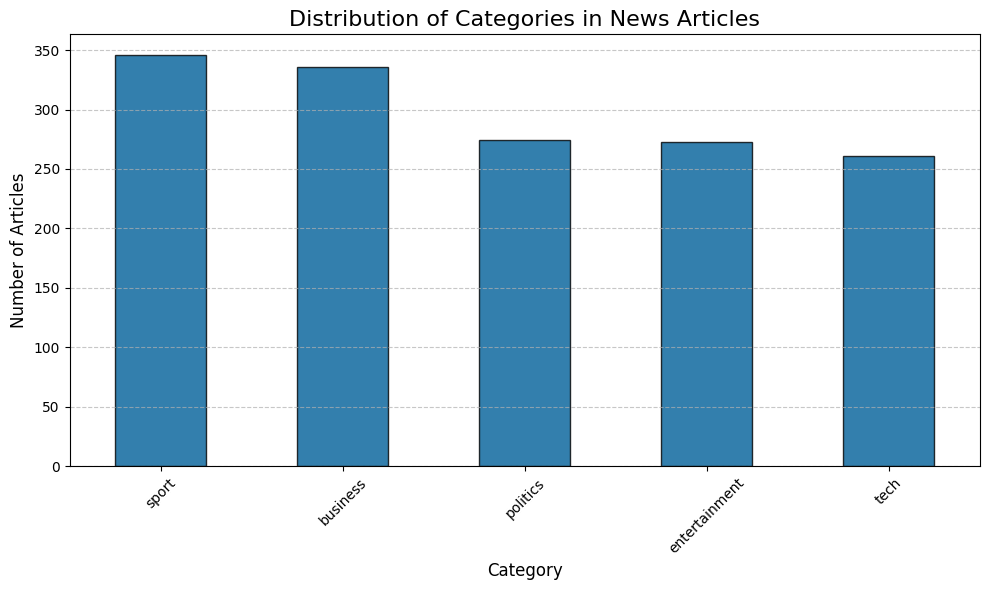

In [13]:
plot_categories_distribution(train_df)

#### The most popular categories are business and sport. Based on the histogram, the training dataset is reasonably balanced, though not perfectly. Therefore, no adjustments will be made to balance the categories. 

In [14]:
# Check for duplicates in the train dataset
print("Checking for duplicates in the train dataset: \n")

duplicates = train_df[train_df.duplicated(subset=['Text'], keep=False)].sort_values(by='Text')
duplicates

Checking for duplicates in the train dataset: 



,ArticleId,Text,Category
494,1326,ask jeeves joins web log market ask jeeves has...,tech
228,1098,ask jeeves joins web log market ask jeeves has...,tech
1430,1042,aviator creator in oscars snub the man who s...,entertainment
695,374,aviator creator in oscars snub the man who s...,entertainment
443,1847,blind student hears in colour a blind studen...,tech
...,...,...,...
1047,789,virus poses as christmas e-mail security firms...,tech
1409,957,web radio takes spanish rap global spin the ra...,tech
616,110,web radio takes spanish rap global spin the ra...,tech
63,2017,what high-definition will do to dvds first it ...,tech


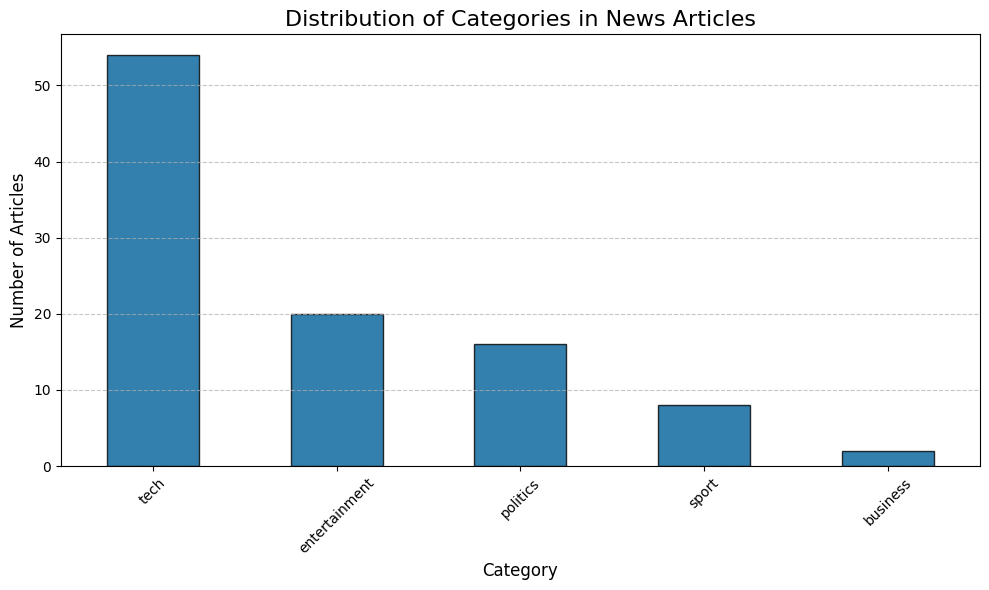

In [15]:
# Plot the distribution of categories in the dataset with duplicates highlighted

plot_categories_distribution(duplicates)

### Summary:
* Train dataset has 1490 rows, 3 columns
* Test dataset has 735 rows, 2 columns
* Text and Category have object data type
* No missing values
* 5 categories: business, tech, politics, sport, entertaiment
* Train dataset is more/less balanced
* Train dataset has duplicates

### Remove duplicated values in train dataset and plot distribution:

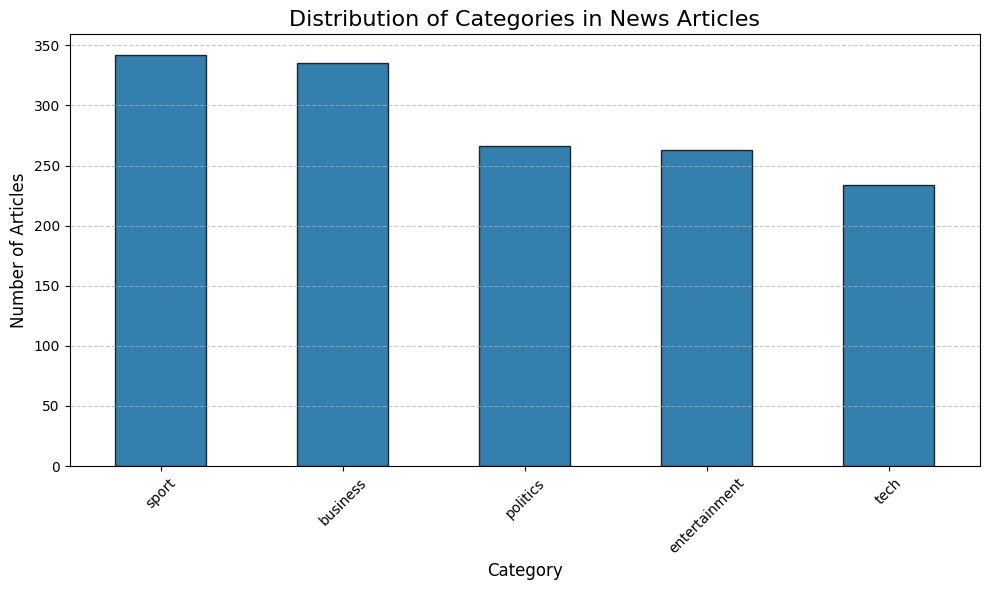

In [16]:
# Remove duplicates from the train dataset

train_df = train_df.drop_duplicates(subset=['Text'])
plot_categories_distribution(train_df)

### Let's create word clouds per each category:

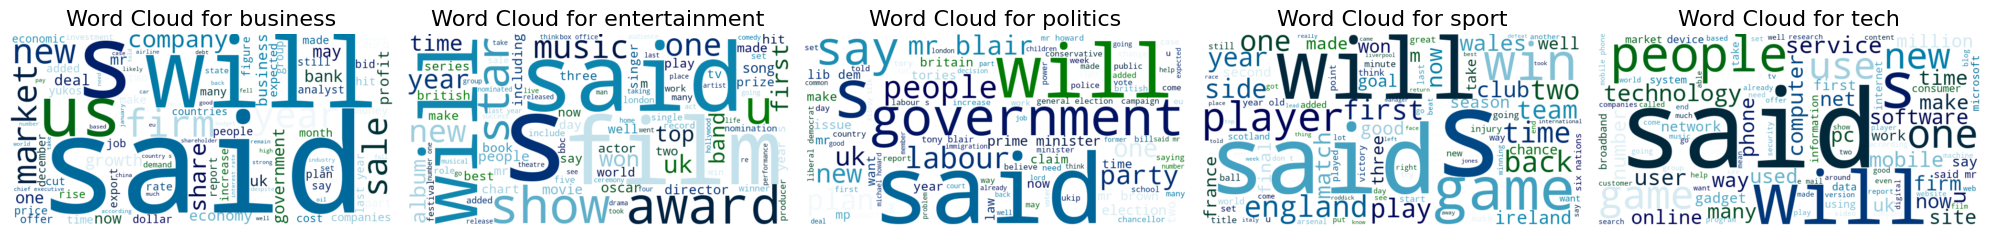

In [17]:
grouped_text = train_df.groupby('Category')['Text'].apply(lambda x: ' '.join(x))

def plot_wordcloud(category, text, ax):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='ocean', max_words=100).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for {category}", fontsize=16)
    ax.axis('off')

fig, axes = plt.subplots(1, len(grouped_text), figsize=(20, 10), sharex=True, sharey=True)

for idx, (category, text) in enumerate(grouped_text.items()):
    plot_wordcloud(category, text, axes[idx])

plt.tight_layout()
plt.show()

### Word Extraction

#### Create a TF-IDF matrix from our documents.

In [53]:
# Group text by category
grouped_text = train_df.groupby('Category')['Text'].apply(lambda x: ' '.join(x))

In [54]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [55]:
# Fit and transform the grouped text
category_dtm = tfidf.fit_transform(grouped_text)

In [56]:
# Extract feature names (words)
feature_names = tfidf.get_feature_names_out()

In [57]:
# Get top 5 words for each category
top_words_per_category = {}
for idx, category in enumerate(grouped_text.index):
    # Get the row corresponding to the category
    category_row = category_dtm[idx].toarray().flatten()
    # Get indices of top 5 words
    top_word_indices = category_row.argsort()[-5:][::-1]
    # Map indices to words
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_category[category] = top_words

# Display top words for each category
for category, words in top_words_per_category.items():
    print(f"Category: {category}, Top Words: {', '.join(words)}")

Category: business, Top Words: said, year, mr, market, economy
Category: entertainment, Top Words: film, said, best, year, music
Category: politics, Top Words: said, mr, labour, election, government
Category: sport, Top Words: said, game, year, england, time
Category: tech, Top Words: said, people, users, software, mobile


**Common Words:** Frequently used words like "said" and "will" are prevalent across all categories.

**Category-Specific Words:**

- **Business:** Terms such as "market" and "economy" emphasize corporate activities and financial discussions.
- **Entertainment:** Words like "film" and "music" highlight topics related to movies, music, and celebrities.
- **Politics:** Keywords such as "labor", "election", and "government" reflect discussions around political leaders and elections.
- **Sport:** Terms like "game" and "england" focus on sports events, players, and competitions.
- **Tech:** Words such as "user", "software", and "mobile" indicate topics related to technology, innovations, and software development.


Article Length Distribution:

/var/folders/65/n8nz00p96075kkn72cxp3sth0000gn/T/ipykernel_93929/1355603948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Category', y='article_length', palette='ocean')


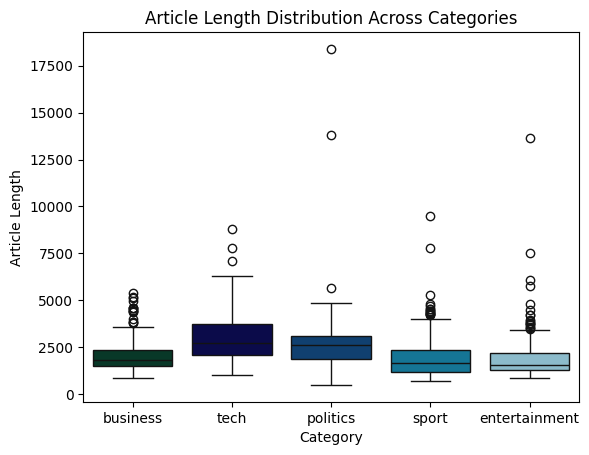

In [58]:
train_df['article_length'] = train_df['Text'].apply(len)
sns.boxplot(data=train_df, x='Category', y='article_length', palette='ocean')
plt.title('Article Length Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Article Length')
plt.show()

* **Tech** and **politics** articles are generally longer on average compared to other categories.
* All categories have outliers, with some articles being very long.

```markdown
### Exploratory Data Analysis (EDA) and Plan of Analysis

#### Visualizations
1. **Category Distribution**: A histogram was plotted to visualize the distribution of news articles across categories. The training dataset is reasonably balanced, with business and sport being the most popular categories.
2. **Word Clouds**: Word clouds were generated for each category to identify frequently used words. These visualizations highlighted category-specific keywords, such as "market" for business and "game" for sport.
3. **Article Length Distribution**: A boxplot was created to analyze the length of articles across categories. Tech and politics articles tend to be longer, with outliers present in all categories.

#### Data Cleaning Procedures
1. **Remove Duplicates**: Duplicate articles were identified and removed from the training dataset to ensure data quality.
2. **Text Preprocessing**:
    - Convert text to lowercase for uniformity.
    - Remove punctuation and empty strings to reduce noise.
    - Apply stemming to reduce words to their root forms (e.g., "running" → "run").
    - Remove stop words to focus on meaningful words.

#### Plan of Analysis
Based on the EDA findings, the following plan was devised:
1. **Feature Extraction**:
    - Use **TF-IDF** (Term Frequency-Inverse Document Frequency) to convert text into numerical features. TF-IDF emphasizes important words while downweighting common ones.
    - Experiment with n-gram tokenization to capture word sequences.
2. **Modeling**:
    - Implement unsupervised learning techniques like **Non-negative Matrix Factorization (NMF)** and **Truncated Singular Value Decomposition (TSVD)** for dimensionality reduction and topic modeling.
    - Train supervised models like **Support Vector Classification (SVC)** and **Logistic Regression** for classification tasks.
3. **Evaluation**:
    - Use accuracy and confusion matrices to evaluate model performance.
    - Compare results across different percentages of training data to assess data efficiency and generalization.

#### Word Embedding Methods
1. **TF-IDF**:
    - TF-IDF calculates the importance of a word in a document relative to its frequency across all documents. It generates sparse matrices suitable for machine learning models.
    - Example: Words like "government" in politics articles will have higher TF-IDF scores due to their relevance.

2. **GloVe**:
    - GloVe (Global Vectors for Word Representation) creates dense word embeddings by analyzing word co-occurrence statistics in a corpus. It captures semantic relationships between words.
    - Example: "king" and "queen" will have similar embeddings due to their contextual similarity.

3. **Word2Vec**:
    - Word2Vec uses neural networks to generate word embeddings based on context. It employs techniques like CBOW (Continuous Bag of Words) and Skip-Gram.
    - Example: Words appearing in similar contexts, like "game" and "match," will have similar embeddings.

#### References
1. Kaggle Discussions: Insights on text preprocessing and feature extraction.
2. Scikit-learn Documentation: Implementation of TF-IDF and machine learning models.
3. Research Papers: Original papers on GloVe and Word2Vec for understanding word embedding techniques.
```

<div style="background-color: #005f99; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Data Preprocessing
</div>

Before text data is transformed into numerical features the text string data can be
preprocessed. These steps include:
* **Words lowercase**
  
  Converting all text to lowercase ensures uniformity. For example, "Tech" and "tech" are the same word. This reduces redundancy.
  
* **Remove punctuation and additional empty strings**

  Punctuation typically does not have meaningful information. Eliminating empty strings removes unnecessary noise.

* **Stemming**

  Stemming reduces words to their base or root form (e.g., "running" → "run"). This minimizes redundancy, reduces the feature space and aids generalization.

* **Stop word removal**

  Removing stop words reduces the noise and allows the model to focus on more important words that convey the actual meaning of the text.

In [59]:
def pre_process(df):
    reviews = []
    stopwords_set = set(stopwords.words("english"))
    ps = PorterStemmer()
    for p in tqdm(df['Text']):
        # convert to lowercase 
        p = p.lower()
        # remove punctuation and additional empty strings
        p = ''.join([c for c in p if c not in punctuation])
        reviews_split = p.split()
        reviews_wo_stopwords = [word for word in reviews_split if not word in stopwords_set]
        reviews_stemm = [ps.stem(w) for w in reviews_wo_stopwords]
        p = ' '.join(reviews_stemm)
        reviews.append(p)
    return reviews

In [60]:
train_df['Text_pp'] = pre_process(train_df)
test_df['Text_pp'] = pre_process(test_df)

# compare the same phrase before and after pre-processing
print('Phrase before pre-processing: ', train_df['Text'][0])
print('Phrase after pre-processing: ', train_df['Text_pp'][0])

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/mehdiafiatpour/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


<div style="background-color: #005f99; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Word Embedding
</div>

The **TfidfVectorizer** is a feature extraction technique widely used in natural language processing (NLP) and text analysis. It transforms raw text data into numerical feature vectors using the TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme and evaluate the importance of a word in a document.

Additionaly after data preprocessing will be applied tokenization. It will convert large text strings to shorter, more useful segments (n-gram).

**Why TF-IDF Is Useful:**
* Dimensionality Reduction: By focusing on important words, TF-IDF reduces noise in the data.
* Weighted Representation: Common but uninformative words (like stop words) are downweighted, while rare but contextually important words are emphasized.
* Sparsity: TF-IDF generates sparse matrices suitable for machine learning models, especially linear classifiers like SVMs or matrix factorization techniques.

#### Plan Based on EDA:
EDA identified key patterns in the data. Based on these findings, here's a plan to implement TF-IDF feature extraction:

**Steps:**
1. Perform text preprocessing: lowercase conversion, punctuation removal, stemming, and stop word removal (as reasoned earlier).
2. Compute TF-IDF for the cleaned text data using TfidfVectorizer in scikit-learn.
3. Experiment with key parameters
4. Train classification models (TruncatedSVD, NMF, SVM, logistic regression) using the TF-IDF features.
5. Perform grid search for hyperparameter tuning.
. Evaluate models using accuracy and confusion matrices.

<div style="background-color: #013a63; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Building and Training Models
</div>

<div style="background-color: #005f99; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Unsupervised Learning
</div>

We are going to create GridSearchCV pipeline with TfidfVectorizer step for data preprocessing and Non-negative Matrix Factorization (NMF), Truncated Singular Value Decomposition (TSVD) as matrix factorization models.

**Non-negative Matrix Factorization (NMF)** is a dimensionality reduction technique used to factorize a non-negative matrix into two lower-rank non-negative matrices. NMF captures latent structures by decomposing the input matrix V into W (basis matrix) and H (coefficient matrix), such that 
V ≈ WH. The non-negativity constraint makes the factorization parts interpretable, often representing additive combinations of components, like topics in documents.

**Truncated Singular Value Decomposition (TruncatedSVD)** is a dimensionality reduction method that approximates a matrix using a reduced number of singular values, preserving the most important features. It is commonly used for sparse data like text and works without requiring non-negativity.

In [70]:
X = train_df['Text_pp']
y = train_df['Category']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# using all texts in the factorizing matrix does not lead to data leak
# because the labels are not included
X_full = pd.concat([train_df['Text_pp'], test_df['Text_pp']])
y_full = pd.concat([y, pd.DataFrame(["unknown"] * test_df['Text_pp'].shape[0])])

In [ ]:
def topic_mapping_accuracy(estimator, X, y_true):
    # Transform the input data using the fitted estimator
    pred = estimator.transform(X_val)
    y_pred = np.argmax(pred, axis=1)
    
    # Define the topic mapping
    topic_mapping = {}
    
    # n_components = 5
    for topic in range(5):
        topic_docs_labels = y_val[y_pred == topic]
        most_common_label = Counter(topic_docs_labels).most_common(1)[0][0]
        topic_mapping[topic] = most_common_label
    
    y_pred = [topic_mapping[topic] for topic in y_pred]
    
    # Calculate accuracy
    return accuracy_score(y_val, y_pred)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('dim_reduction', NMF()),  # Placeholder for dimensionality reduction
])

# Define the parameter grid for both NMF and LSA
param_grid = [
    {
        'tfidf__max_df': [0.8, 1.0],
        'tfidf__min_df': [1, 2, 5],  
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 
        'tfidf__lowercase': [True],
        'dim_reduction': [NMF(n_components=5, random_state=42)],
        'dim_reduction__solver': ['mu'],
        'dim_reduction__beta_loss': ['kullback-leibler'],
        'dim_reduction__init': ['nndsvda','nndsvdar']
    },
    {
        'tfidf__max_df': [0.8, 1.0],  
        'tfidf__min_df': [1, 2, 5],  
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],  
        'tfidf__lowercase': [True],
        'dim_reduction': [TruncatedSVD(n_components=5)],
        'dim_reduction__algorithm': ['randomized']
    }
]

# Store results for comparison
results = []

# Define percentages of training data to use
percentages = [0.1, 0.2, 0.5, 1.0]

for pct in percentages:
    print(f"Training with {int(pct * 100)}% of the data...")
    
    # Create a subset of the training data
    if pct == 1.0:
        X_subset, y_subset = X_full, y_full
    else:
        X_subset, _, y_subset, _ = train_test_split(X_full, y_full, train_size=pct, stratify=y_full, random_state=42)
    
    # Grid search on the subset
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=topic_mapping_accuracy,
        cv=3,  # 3-fold cross-validation
        verbose=1
    )
    grid_search.fit(X_subset, y_subset)
    
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    cv_results_df['percentage'] = pct  # Add a column for percentage
    
    results.append(cv_results_df)

# Combine all results into a single DataFrame
final_results_df = pd.concat(results, ignore_index=True)

# Display or save the final results DataFrame
final_results_df.head()

Filter grid search results by percentage of training data used

In [72]:
final_results_df_10_pct = final_results_df[final_results_df['percentage'] == 0.1]
final_results_df_10_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_tfidf__lowercase,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
0,0.163222,0.025026,0.138441,0.002602,"NMF(n_components=5, random_state=42)",True,NaN,"{'dim_reduction': NMF(n_components=5, random_state=42), 'tfidf__lowercase': True}",0.788194,0.763889,0.732639,0.761574,0.022739,1,0.1
1,0.054713,0.004308,0.127235,0.008720,TruncatedSVD(n_components=5),True,randomized,"{'dim_reduction': TruncatedSVD(n_components=5), 'dim_reduction__algorithm': 'randomized', 'tfidf...",NaN,NaN,0.343750,NaN,NaN,2,0.1


In [73]:
final_results_df_20_pct = final_results_df[final_results_df['percentage'] == 0.2]
final_results_df_20_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_tfidf__lowercase,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
2,0.207716,0.063710,0.133190,0.005578,"NMF(n_components=5, random_state=42)",True,NaN,"{'dim_reduction': NMF(n_components=5, random_state=42), 'tfidf__lowercase': True}",0.888889,0.888889,0.913194,0.896991,0.011458,1,0.2
3,0.095823,0.006998,0.104594,0.000990,TruncatedSVD(n_components=5),True,randomized,"{'dim_reduction': TruncatedSVD(n_components=5), 'dim_reduction__algorithm': 'randomized', 'tfidf...",0.357639,0.385417,0.364583,0.369213,0.011803,2,0.2


In [74]:
final_results_df_50_pct = final_results_df[final_results_df['percentage'] == 0.5]
final_results_df_50_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_tfidf__lowercase,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
4,0.339264,0.037424,0.142703,0.000375,"NMF(n_components=5, random_state=42)",True,NaN,"{'dim_reduction': NMF(n_components=5, random_state=42), 'tfidf__lowercase': True}",0.930556,0.920139,0.909722,0.920139,0.008505,1,0.5
5,0.192868,0.009572,0.115475,0.011752,TruncatedSVD(n_components=5),True,randomized,"{'dim_reduction': TruncatedSVD(n_components=5), 'dim_reduction__algorithm': 'randomized', 'tfidf...",0.375000,0.388889,NaN,NaN,NaN,2,0.5


In [75]:
final_results_df_100_pct = final_results_df[final_results_df['percentage'] == 1.0]
final_results_df_100_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dim_reduction,param_tfidf__lowercase,param_dim_reduction__algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
6,0.560135,0.034340,0.142233,0.001104,"NMF(n_components=5, random_state=42)",True,NaN,"{'dim_reduction': NMF(n_components=5, random_state=42), 'tfidf__lowercase': True}",0.916667,0.927083,0.895833,0.913194,0.012992,1,1.0
7,0.328386,0.003634,0.120555,0.011767,TruncatedSVD(n_components=5),True,randomized,"{'dim_reduction': TruncatedSVD(n_components=5), 'dim_reduction__algorithm': 'randomized', 'tfidf...",0.354167,0.385417,0.361111,0.366898,0.013398,2,1.0


In [76]:
best_unsupervised_model = grid_search.best_estimator_

In [77]:
pred = best_unsupervised_model.transform(X_val)
y_pred = np.argmax(pred, axis=1)

topic_mapping = {}

# n_components = 5
for topic in range(5):
    topic_docs_labels = y_val[y_pred == topic]
    most_common_label = Counter(topic_docs_labels).most_common(1)[0][0]
    topic_mapping[topic] = most_common_label

print("Topic Mapping:", topic_mapping)

y_pred = [topic_mapping[topic] for topic in y_pred]
nmf_acc = np.mean(y_val == y_pred)
print("Accuracy Validation Dataset:", nmf_acc)

Topic Mapping: {0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}
Accuracy Validation Dataset: 0.9270833333333334


Confusion matrix:

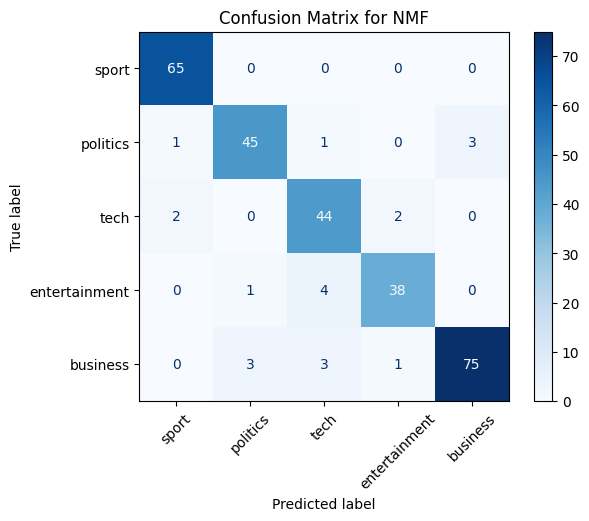

In [78]:
cm = confusion_matrix(y_val, y_pred, labels=list(topic_mapping.values()))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(topic_mapping.values()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix for NMF")
plt.show()

#### Observations:
1. **Sport**, **Politics** categories are predicted with high accuracy, as the diagonal values are much larger than any off-diagonal values in their rows.
2. **Business** has the highest confusion, with a few misclassifications as **Tech**.

<div style="background-color: #005f99; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Supervised Learning
</div>

**Support Vector Classification (SVC)** is a supervised machine learning algorithm that finds a hyperplane to separate data into classes with maximum margin. It is effective for both linear and non-linear classification using kernels.

**LogisticRegression** a simple and interpretable linear model often performs well on text classification tasks.

In [80]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')), 
    ('model', SVC(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'model': [SVC(random_state=42)],
    'tfidf__max_df': [0.8, 1.0], 
    'tfidf__min_df': [1, 5],  
    'tfidf__ngram_range': [(1, 1), (1, 3)], 
    'model__C': [0.1, 1, 10], 
    'model__kernel': ['linear']
},
{
    'model': [LogisticRegression(random_state=42)],
    'tfidf__max_df': [0.8, 1.0], 
    'tfidf__min_df': [1, 5],  
    'tfidf__ngram_range': [(1, 1), (1, 3)], 
    'model__penalty': ['l2'],
    'model__C': [0.1, 1, 10],
    'model__solver': ['lbfgs', 'liblinear'],
    'model__max_iter': [500]
}

# Store results for comparison
results = []

# Define percentages of training data to use
percentages = [0.1, 0.2, 0.5, 1.0]

for pct in percentages:
    print(f"Training with {int(pct * 100)}% of the data...")
    
    # Create a subset of the training data
    if pct == 1.0:
        X_subset, y_subset = X_train, y_train
    else:
        X_subset, _, y_subset, _ = train_test_split(X_train, y_train, train_size=pct, stratify=y_train, random_state=42)
    
    # Grid search on the subset
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='accuracy',
        cv=3,  # 3-fold cross-validation
        verbose=1
    )
    grid_search.fit(X_subset, y_subset)
    
    cv_results_df = pd.DataFrame(grid_search.cv_results_)
    cv_results_df['percentage'] = pct  # Add a column for percentage
    
    results.append(cv_results_df)

# Combine all results into a single DataFrame
final_results_df = pd.concat(results, ignore_index=True)

# Display or save the final results DataFrame
final_results_df.head()

Training with 10% of the data...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Training with 20% of the data...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Training with 50% of the data...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Training with 100% of the data...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__kernel,param_tfidf__max_df,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
0,0.068784,0.052120,0.009627,0.000463,"SVC(kernel='linear', random_state=42)",linear,0.8,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 0.8}",0.846154,0.868421,1.000000,0.904858,0.067887,1,0.1
1,0.030979,0.001352,0.010115,0.000604,"SVC(kernel='linear', random_state=42)",linear,1.0,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 1.0}",0.846154,0.868421,1.000000,0.904858,0.067887,1,0.1
2,0.079462,0.001574,0.025739,0.001351,"SVC(kernel='linear', random_state=42)",linear,0.8,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 0.8}",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2
3,0.079192,0.000896,0.025407,0.000993,"SVC(kernel='linear', random_state=42)",linear,1.0,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 1.0}",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2
4,0.345335,0.006178,0.105109,0.000822,"SVC(kernel='linear', random_state=42)",linear,0.8,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 0.8}",0.953125,0.973958,0.979167,0.968750,0.011251,1,0.5


Filter grid search results by percentage of training data used:

In [81]:
final_results_df_10_pct = final_results_df[final_results_df['percentage'] == 0.1]
final_results_df_10_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__kernel,param_tfidf__max_df,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
0,0.068784,0.052120,0.009627,0.000463,"SVC(kernel='linear', random_state=42)",linear,0.8,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 0.8}",0.846154,0.868421,1.0,0.904858,0.067887,1,0.1
1,0.030979,0.001352,0.010115,0.000604,"SVC(kernel='linear', random_state=42)",linear,1.0,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 1.0}",0.846154,0.868421,1.0,0.904858,0.067887,1,0.1


In [82]:
final_results_df_20_pct = final_results_df[final_results_df['percentage'] == 0.2]
final_results_df_20_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__kernel,param_tfidf__max_df,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
2,0.079462,0.001574,0.025739,0.001351,"SVC(kernel='linear', random_state=42)",linear,0.8,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 0.8}",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2
3,0.079192,0.000896,0.025407,0.000993,"SVC(kernel='linear', random_state=42)",linear,1.0,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 1.0}",0.961039,0.974026,0.894737,0.943267,0.034723,1,0.2


In [83]:
final_results_df_50_pct = final_results_df[final_results_df['percentage'] == 0.5]
final_results_df_50_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__kernel,param_tfidf__max_df,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
4,0.345335,0.006178,0.105109,0.000822,"SVC(kernel='linear', random_state=42)",linear,0.8,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 0.8}",0.953125,0.973958,0.979167,0.968750,0.011251,1,0.5
5,0.341494,0.000827,0.104350,0.001284,"SVC(kernel='linear', random_state=42)",linear,1.0,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 1.0}",0.947917,0.973958,0.979167,0.967014,0.013670,2,0.5


In [84]:
final_results_df_100_pct = final_results_df[final_results_df['percentage'] == 1.0]
final_results_df_100_pct.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__kernel,param_tfidf__max_df,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,percentage
6,1.138517,0.008581,0.327859,0.003625,"SVC(kernel='linear', random_state=42)",linear,0.8,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 0.8}",0.971354,0.960938,0.968750,0.967014,0.004426,1,1.0
7,1.133799,0.002268,0.329989,0.004407,"SVC(kernel='linear', random_state=42)",linear,1.0,"{'model': SVC(kernel='linear', random_state=42), 'model__kernel': 'linear', 'tfidf__max_df': 1.0}",0.971354,0.958333,0.966146,0.965278,0.005351,2,1.0


Create model with the best parameters:

In [85]:
best_supervised_model = grid_search.best_estimator_

In [86]:
y_pred = best_supervised_model.predict(X_val)
acc = np.mean(y_val == y_pred)
print("Accuracy Validation Dataset:", acc)

Accuracy Validation Dataset: 0.96875


<div style="background-color: #005f99; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Test Results
</div>

In [87]:
X_test = test_df['Text_pp']

In [88]:
pred_test = best_unsupervised_model.transform(X_test)
y_pred_test = np.argmax(pred_test, axis=1)

y_pred = [topic_mapping[topic] for topic in y_pred_test]

submission = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': y_pred
})
submission.to_csv('submission_nmf.csv', index=False)

The test result of NMF is 0.96326

In [89]:
y_pred_test = best_supervised_model.predict(X_test)

submission = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': y_pred_test
})
submission.to_csv('submission_svc.csv', index=False)

The test result of SVC is 0.98367

<div style="background-color: #005f99; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Performance Comparison
</div>

Let's look on results of change train data size (include only 10%, 20%, 50% of labels), and observe train/test performance changes for both models.

Compare results of supervised and unsupervised approaches:

|Model|100% |50%|20%|10%|Test|
|---|---|---|---|---|---|
|NMF|0.979167|0.966435|0.953704|0.910880|0.96326|
|SVC|0.973958|0.968750|0.943267|0.904858|0.98367|

#### Data Efficiency

**NMF (Unsupervised Method):**
NMF achieves better performance on smaller data subsets (10%, 20%) compared to SVC:
At 10%, NMF achieves 0.910880 accuracy, outperforming SVC (0.904858).
At 20%, NMF reaches 0.953704, higher than SVC (0.943267).

It shows that NMF is more data-efficient, as it can extract useful patterns with less reliance on labeled data.

**SVC (Supervised Method):**
At 50% and 100%, SVC achieves similar or slightly better performance compared to NMF.

#### Overfitting

**NMF:**
NMF’s test accuracy (0.96326) is very close to its performance on the full training set (100%: 0.979167), indicating low susceptibility to overfitting.

**SVC:**
SVC achieves the highest test accuracy (0.98367), outperforming NMF on the test set. This indicates excellent generalization on the unseen data.

<div style="background-color: #013a63; color: white; padding: 10px; border-radius: 10px; text-align: center; font-size: 24px; font-weight: bold;">
    Conclusion
</div>

NMF excels in scenarios with limited data, while SVC demonstrates superior performance with sufficient training data, making both approaches valuable depending on the dataset and labeling constraints.